In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def _butterfly_on_ax(
    ax,
    df,
    title,
    top_n=30,
    chg_col=None,
    bar_height=0.45
):
    # === Auto detect %Chg column ===
    if chg_col is None:
        candidates = [c for c in df.columns if '%Chg' in c]
        if not candidates:
            ax.set_visible(False)
            return
        chg_col = candidates[0]

    # === Data prep ===
    neg = df[df[chg_col] < 0].sort_values(chg_col).head(top_n).reset_index(drop=True)
    pos = df[df[chg_col] > 0].sort_values(chg_col, ascending=False).head(top_n).reset_index(drop=True)

    n = max(len(neg), len(pos))
    if n == 0:
        ax.set_visible(False)
        return

    y = np.arange(n)

    left_vals  = np.zeros(n)
    right_vals = np.zeros(n)
    left_lbls  = [''] * n
    right_lbls = [''] * n

    for i in range(len(neg)):
        left_vals[i] = neg.loc[i, chg_col]
        left_lbls[i] = neg.loc[i, 'Tick']

    for i in range(len(pos)):
        right_vals[i] = pos.loc[i, chg_col]
        right_lbls[i] = pos.loc[i, 'Tick']

    # === Plot bars ===
    ax.barh(y, left_vals, height=bar_height, color='#B23A48')
    ax.barh(y, right_vals, height=bar_height, color='#2A7F62')

    ax.set_yticks(y)
    ax.set_yticklabels(left_lbls, fontsize=8, fontweight='bold')
    ax.invert_yaxis()

    # Right labels
    ax_r = ax.twinx()
    ax_r.set_ylim(ax.get_ylim())
    ax_r.set_yticks(y)
    ax_r.set_yticklabels(right_lbls, fontsize=8, fontweight='bold')
    ax_r.tick_params(axis='y', length=0)

    # === Scale & center ===
    max_abs = max(np.max(np.abs(left_vals)), np.max(np.abs(right_vals)))
    margin = max_abs * 0.25
    ax.set_xlim(-max_abs - margin, max_abs + margin)
    ax.axvline(0, color='black', linewidth=1)

    # === Value labels ===
    text_offset = margin * 0.35
    for i, v in enumerate(left_vals):
        if v != 0:
            ax.text(v - text_offset, i, f"{v:.2f}%", ha='right', va='center', fontsize=8)

    for i, v in enumerate(right_vals):
        if v != 0:
            ax.text(v + text_offset, i, f"+{v:.2f}%", ha='left', va='center', fontsize=8)

    # === Styling ===
    ax.set_title(title, fontsize=11, fontweight='bold', pad=6)
    ax.grid(axis='x', linestyle='--', alpha=0.25)

    for s in ['top', 'right', 'left', 'bottom']:
        ax.spines[s].set_visible(False)


In [8]:
def visualize_6_butterfly_groups(
    dfs,
    titles,
    top_n=12
):
    """
    dfs    : list of 6 DataFrames
    titles : list of 6 titles (same order)
    """

    assert len(dfs) == 6 and len(titles) == 6

    # Auto height (vertical density aware)
    fig_height = 3 * (top_n * 0.45 + 1.8)
    fig, axes = plt.subplots(
        nrows=3,
        ncols=2,
        figsize=(18, fig_height)
    )

    axes = axes.flatten()

    for ax, df, title in zip(axes, dfs, titles):
        _butterfly_on_ax(
            ax=ax,
            df=df,
            title=title,
            top_n=top_n
        )

    plt.tight_layout()
    plt.show()


# Top `Akum` 20 January 2026

# Top `Akum` 28 January 2026

In [ ]:
# bandarmology_data_20260120_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/20_jan_2026/Top Akum Bandarmologi.csv"
# bandarmology_l5d_20260120_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/20_jan_2026/Top Akum Bandarmologi 5d.csv"
# foreign_l5d_20260120_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/20_jan_2026/Top Akum Foreign 5d.csv"



# # load dataset bandarmology_data_20260120_path
# df_bandarmology_data_20260120 = pd.read_csv(bandarmology_data_20260120_path)
# # load dataset bandarmoalogy_l5d_20260120_path
# df_bandarmology_l5d_20260120 = pd.read_csv(bandarmology_l5d_20260120_path)

# # load dataset foreign_l5d_20260120_path
# df_foreign_l5d_20260120 = pd.read_csv(foreign_l5d_20260120_path)


# dfs = [
#     df_bandarmology_data_20260120,
#     df_bandarmology_l5d_20260120,
#     df_foreign_l5d_20260120,
# ]

# titles = [
#     "Bandarmology",
#     "Bandarmology (5D)",
#     "Foreign Flow",
#     "Foreign Flow (5D)",
#     "Non-Retail Flow",
#     "Non-Retail Flow (5D)"
# ]

# visualize_6_butterfly_groups(
#     dfs=dfs,
#     titles=titles,
#     top_n=30
# )


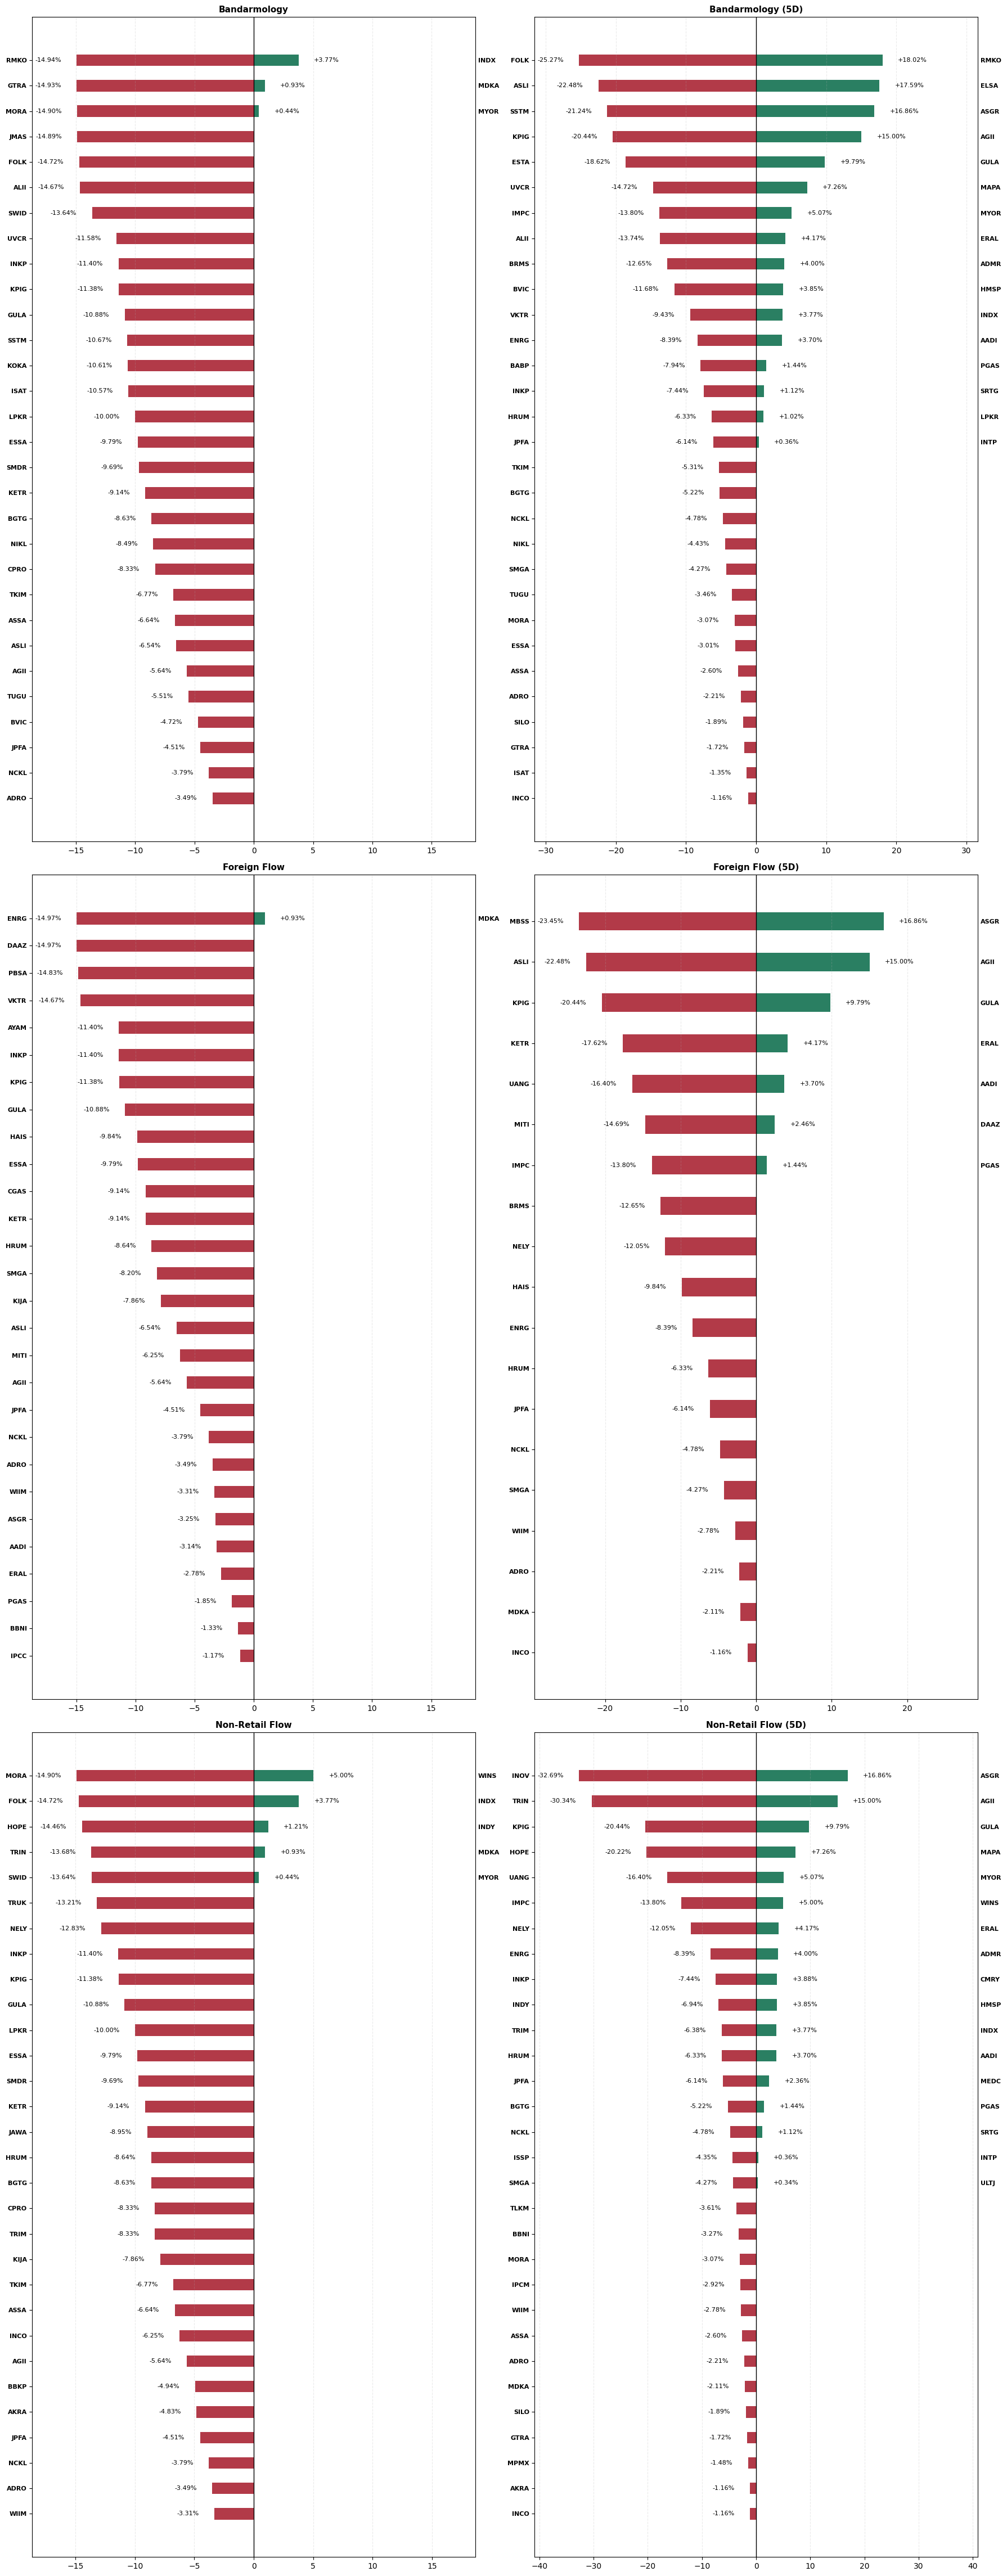

In [15]:
bandarmology_data_20260128_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/28_jan_2026/Top Akum Bandarmologi.csv"
bandarmology_l5d_20260128_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/28_jan_2026/Top Akum Bandarmologi 5d.csv"
foreign_data_20260128_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/28_jan_2026/Top Akum Foreign.csv"
foreign_l5d_20260128_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/28_jan_2026/Top Akum Foreign 5d.csv"
non_retail_data_20260128_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/28_jan_2026/Top Akum NonRetail.csv"
non_retail_l5d_20260128_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/28_jan_2026/Top Akum NonRetail 5d.csv"



# load dataset bandarmology_data_20260128_path
df_bandarmology_data_20260128 = pd.read_csv(bandarmology_data_20260128_path)
# load dataset bandarmoalogy_l5d_20260128_path
df_bandarmology_l5d_20260128 = pd.read_csv(bandarmology_l5d_20260128_path)

# load dataset foreign_data_20260128_path
df_foreign_data_20260128 = pd.read_csv(foreign_data_20260128_path)
# load dataset foreign_l5d_20260128_path
df_foreign_l5d_20260128 = pd.read_csv(foreign_l5d_20260128_path)

# load dataset non_retail_data_20260128_path
df_non_retail_data_20260128 = pd.read_csv(non_retail_data_20260128_path)
# load dataset non_retail_l5d_20260128_path
df_non_retail_l5d_20260128 = pd.read_csv(non_retail_l5d_20260128_path)


dfs = [
    df_bandarmology_data_20260128,
    df_bandarmology_l5d_20260128,
    df_foreign_data_20260128,
    df_foreign_l5d_20260128,
    df_non_retail_data_20260128,
    df_non_retail_l5d_20260128
]

titles = [
    "Bandarmology",
    "Bandarmology (5D)",
    "Foreign Flow",
    "Foreign Flow (5D)",
    "Non-Retail Flow",
    "Non-Retail Flow (5D)"
]

visualize_6_butterfly_groups(
    dfs=dfs,
    titles=titles,
    top_n=30
)


# Top `Akum` 29 January 2026

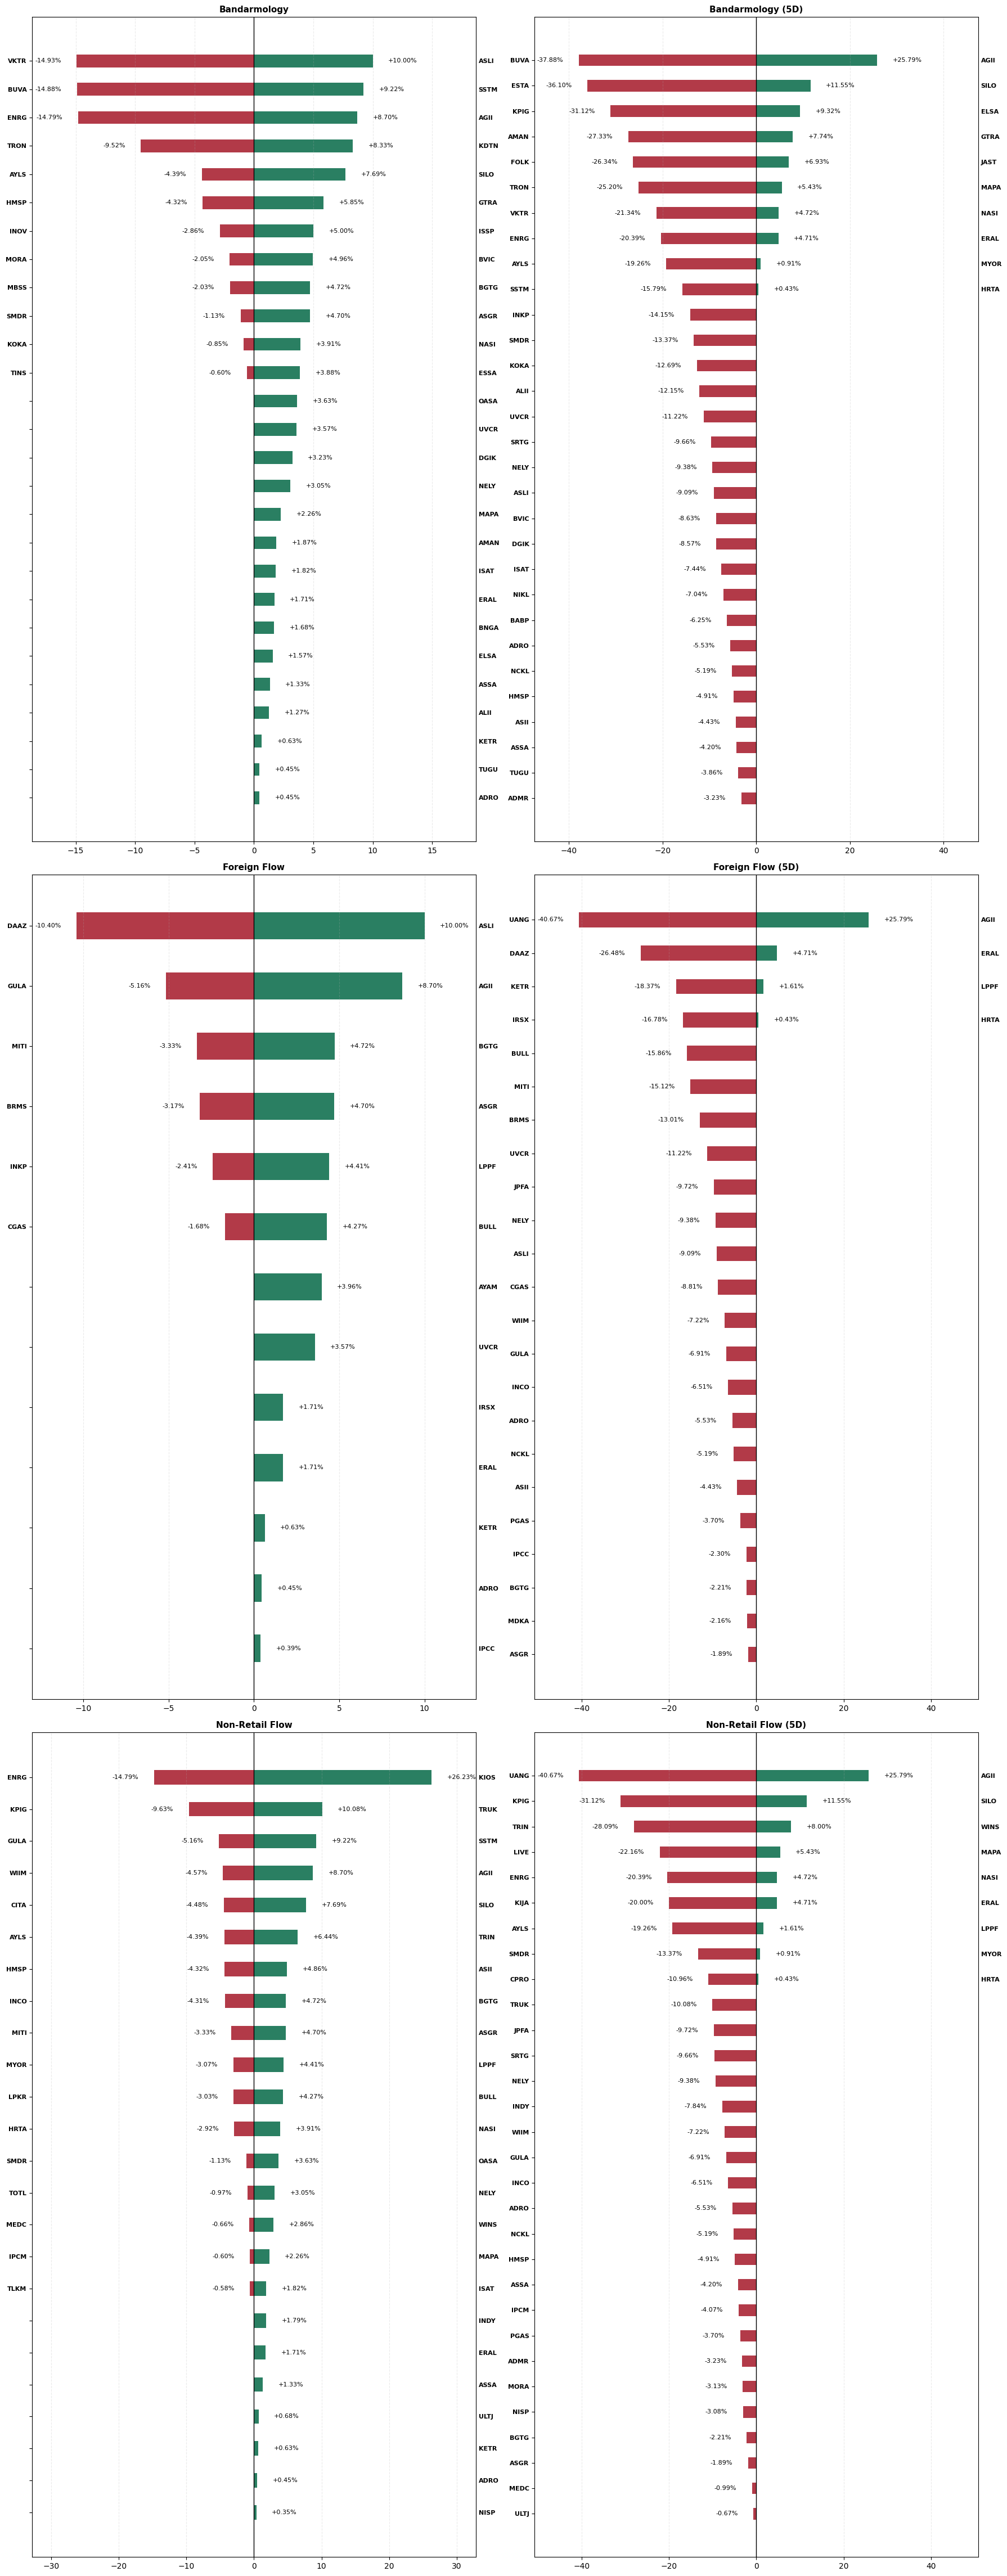

In [16]:
bandarmology_data_20260129_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/29_jan_2026/Top Akum Bandarmologi.csv"
bandarmology_l5d_20260129_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/29_jan_2026/Top Akum Bandarmologi 5d.csv"
foreign_data_20260129_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/29_jan_2026/Top Akum Foreign.csv"
foreign_l5d_20260129_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/29_jan_2026/Top Akum Foreign 5d.csv"
non_retail_data_20260129_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/29_jan_2026/Top Akum NonRetail.csv"
non_retail_l5d_20260129_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/29_jan_2026/Top Akum NonRetail 5d.csv"



# load dataset bandarmology_data_20260129_path
df_bandarmology_data_20260129 = pd.read_csv(bandarmology_data_20260129_path)
# load dataset bandarmoalogy_l5d_20260129_path
df_bandarmology_l5d_20260129 = pd.read_csv(bandarmology_l5d_20260129_path)

# load dataset foreign_data_20260129_path
df_foreign_data_20260129 = pd.read_csv(foreign_data_20260129_path)
# load dataset foreign_l5d_20260129_path
df_foreign_l5d_20260129 = pd.read_csv(foreign_l5d_20260129_path)

# load dataset non_retail_data_20260129_path
df_non_retail_data_20260129 = pd.read_csv(non_retail_data_20260129_path)
# load dataset non_retail_l5d_20260129_path
df_non_retail_l5d_20260129 = pd.read_csv(non_retail_l5d_20260129_path)


dfs = [
    df_bandarmology_data_20260129,
    df_bandarmology_l5d_20260129,
    df_foreign_data_20260129,
    df_foreign_l5d_20260129,
    df_non_retail_data_20260129,
    df_non_retail_l5d_20260129
]

titles = [
    "Bandarmology",
    "Bandarmology (5D)",
    "Foreign Flow",
    "Foreign Flow (5D)",
    "Non-Retail Flow",
    "Non-Retail Flow (5D)"
]

visualize_6_butterfly_groups(
    dfs=dfs,
    titles=titles,
    top_n=30
)


# Top `Akum` 30 January 2026

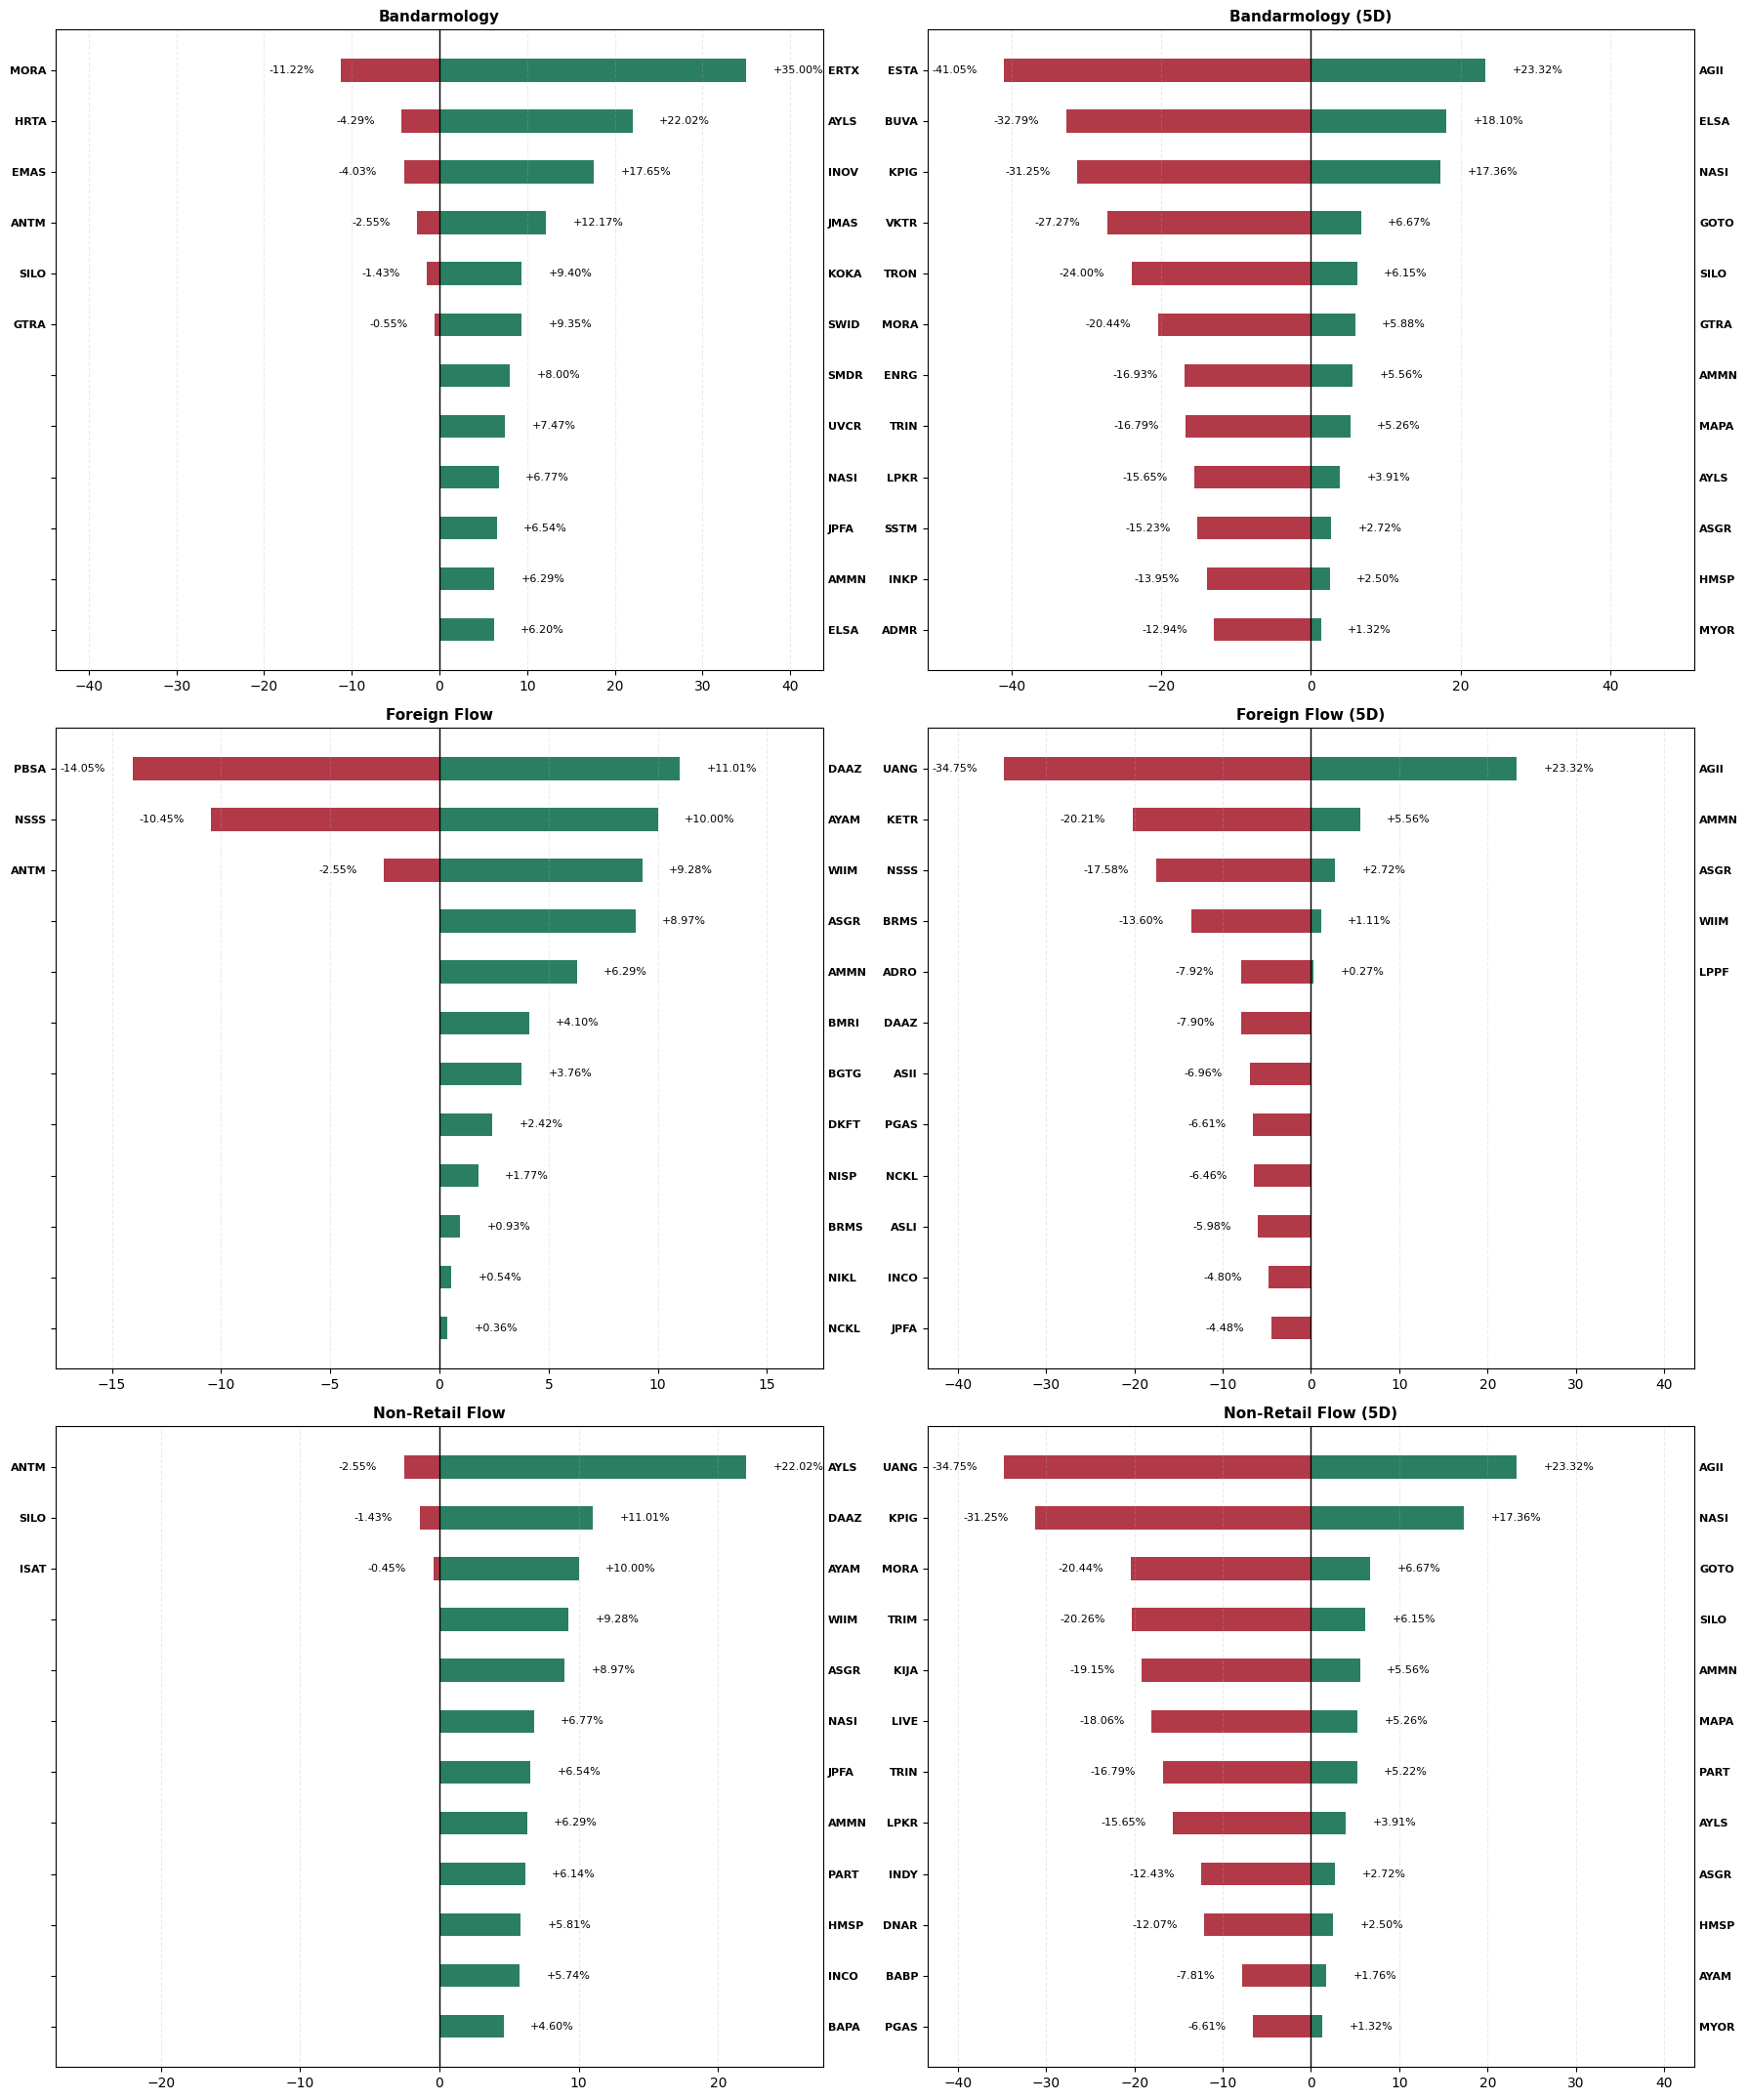

In [11]:
bandarmology_data_20260130_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/30_jan_2026/Top Akum Bandarmologi.csv"
bandarmology_l5d_20260130_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/30_jan_2026/Top Akum Bandarmologi 5d.csv"
foreign_data_20260130_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/30_jan_2026/Top Akum Foreign.csv"
foreign_l5d_20260130_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/30_jan_2026/Top Akum Foreign 5d.csv"
non_retail_data_20260130_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/30_jan_2026/Top Akum NonRetail.csv"
non_retail_l5d_20260130_path = "/Users/albert/Documents/Finances/data/raw/market_data/bandarmology/30_jan_2026/Top Akum NonRetail 5d.csv"



# load dataset bandarmology_data_20260130_path
df_bandarmology_data_20260130 = pd.read_csv(bandarmology_data_20260130_path)
# load dataset bandarmoalogy_l5d_20260130_path
df_bandarmology_l5d_20260130 = pd.read_csv(bandarmology_l5d_20260130_path)

# load dataset foreign_data_20260130_path
df_foreign_data_20260130 = pd.read_csv(foreign_data_20260130_path)
# load dataset foreign_l5d_20260130_path
df_foreign_l5d_20260130 = pd.read_csv(foreign_l5d_20260130_path)

# load dataset non_retail_data_20260130_path
df_non_retail_data_20260130 = pd.read_csv(non_retail_data_20260130_path)
# load dataset non_retail_l5d_20260130_path
df_non_retail_l5d_20260130 = pd.read_csv(non_retail_l5d_20260130_path)


dfs = [
    df_bandarmology_data_20260130,
    df_bandarmology_l5d_20260130,
    df_foreign_data_20260130,
    df_foreign_l5d_20260130,
    df_non_retail_data_20260130,
    df_non_retail_l5d_20260130
]

titles = [
    "Bandarmology",
    "Bandarmology (5D)",
    "Foreign Flow",
    "Foreign Flow (5D)",
    "Non-Retail Flow",
    "Non-Retail Flow (5D)"
]

visualize_6_butterfly_groups(
    dfs=dfs,
    titles=titles,
    top_n=12
)
